# 1. Archive Exploration

Metadata: https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-hfr.71.23

Citation: Data Portal - Metadata Viewer | Environmental Data Initiative (EDI). (2023). Edirepository.org. https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-hfr.71.23

Accessed: 10/24/2025

Description:
‌All hurricanes over the period 1851-2000 with sustained winds of hurricane force (33 meters/sec) within 300 kilometers of the study region were analyzed (n = 105). Using meteorological data from Harvard Forest and the U.S National Hurricane Center

# 2. Data loading and preliminary exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469")

In [3]:
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


# How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

In [9]:
cat5 = df.loc[df.ss == 5]
cat5

,code,start.date,end.date,number,name,ss,track,rf.max
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [34]:
cat5['start.date'] = pd.to_datetime(cat5['start.date'])
cat5['end.date'] = pd.to_datetime(cat5['end.date'])
cat5['duration'] = cat5['end.date'] - cat5['start.date']
cat5.head()

/tmp/ipykernel_3287450/2812029899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['start.date'] = pd.to_datetime(cat5['start.date'])
/tmp/ipykernel_3287450/2812029899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['end.date'] = pd.to_datetime(cat5['end.date'])
/tmp/ipykernel_3287450/2812029899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


# 5: Visualize Saffir-Simpson categories across time

In [82]:
# Coerce start.date to datetime object
df['start.date'] = pd.to_datetime(df['start.date'])

TypeError: yticks() takes from 0 to 2 positional arguments but 5 were given

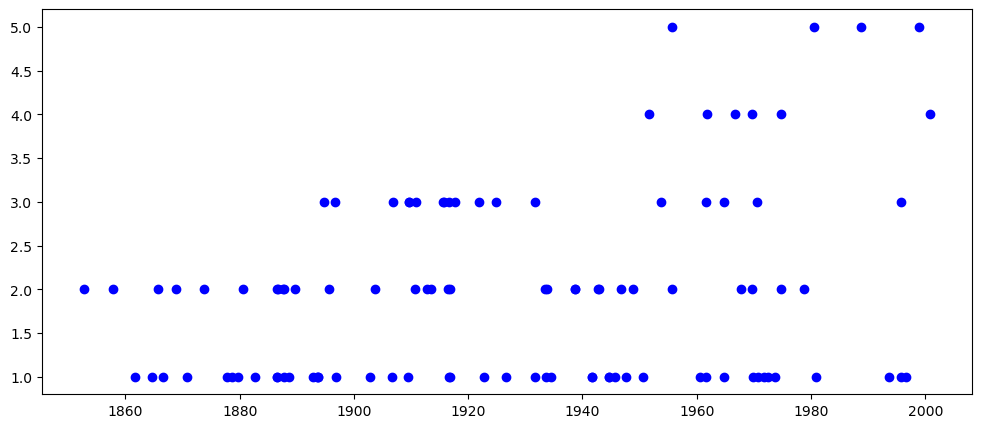

In [85]:
fig, ax = plt.subplots(figsize =(12, 5))

plt.scatter(df['start.date'], df['ss'],
            c = "blue")

plt.yticks(1,2,3,4,5)

ax.set_ylabel('Saffir-Simpson Scale')
ax.set_xlabel('Year')

plt.show()

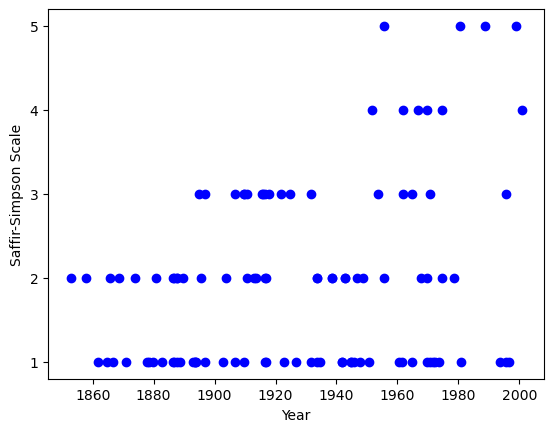

In [67]:
fig, ax = plt.subplots(figsize(12, 5))
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_ylabel('Saffir-Simpson Scale')
ax.set_xlabel('Year')
ax.scatter(df['start.date'], df['ss'], color = "blue")

In [71]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date              object
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In our scatter plot we observe an increase in category 4 and 5 hurricanes towards the end of the century. This observation may be explained by our hypothesis that climate change is real and is having an impact on our hydological systems. 

# Full streamlined workflow

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469")
cat5 = df.loc[df.ss == 5]
cat5.loc[:,'start.date'] = pd.to_datetime(cat5.loc[:,'start.date'])
cat5.loc[:,'end.date'] = pd.to_datetime(cat5.loc[:,'end.date'])
cat5.loc[:,'duration'] = cat5.loc[:,'end.date'] - cat5.loc[:,'start.date']
print("There have been", len(cat5), "category 5 earthquakes")

There have been 4 category 5 earthquakes


/tmp/ipykernel_3287450/1473478755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5.loc[:,'duration'] = cat5.loc[:,'end.date'] - cat5.loc[:,'start.date']
